In [3]:
def extracting_training_test_data(data_path):
    from pandas import read_csv
    
    train_path= data_path+ "S8_train.csv"
    test_path= data_path+ "S8_test.csv"
    train= read_csv(train_path)
    test= read_csv(test_path)
    features= list(train.iloc[51695, :].values)
    train= train.drop([51695], axis= 0)
    train.columns= features
    features.remove("target")
    test.columns= features
    return(train, test)

In [4]:
%%capture
data_path= "data/"
train, test= extracting_training_test_data(data_path)

In [5]:
train.iloc[:, -1].unique()

array(['Class_2', 'Class_8', 'Class_6', 'Class_3', 'Class_7', 'Class_4',
       'Class_5', 'Class_9', 'Class_1'], dtype=object)

In [6]:
# it's easy enough to encode the classes without an extra module
train['target'] = [x[-1] for x in train['target']]
train['target'] = train['target'].astype(int) - 1
train.target.unique()

array([1, 7, 5, 2, 6, 3, 4, 8, 0])

In [7]:
from sklearn.model_selection import train_test_split
# slice features and classes from df
X = train.iloc[:, 1:94].values.astype(float)
y = train.iloc[:, 94].values.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

# scale features
sc = StandardScaler()
X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, input_dim = 93))
    classifier.add(Dense(units = 50))
    classifier.add(Dense(units = 9, activation = 'softmax'))
    classifier.compile(optimizer = 'sgd', 
                       loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [10]:
classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 1s 13ms/step - loss: 2.0470 - accuracy: 0.3611 - val_loss: 1.2583 - val_accuracy: 0.6345
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 1.1773 - accuracy: 0.6499 - val_loss: 1.0194 - val_accuracy: 0.6836
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.9845 - accuracy: 0.6933 - val_loss: 0.9258 - val_accuracy: 0.7045
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.9098 - accuracy: 0.7058 - val_loss: 0.8750 - val_accuracy: 0.7140
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.8508 - accuracy: 0.7191 - val_loss: 0.8425 - val_accuracy: 0.7191
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.8265 - accuracy: 0.7188 - val_loss: 0.8191 - val_accuracy: 0.7223
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.8091 - accuracy: 0.7240 - val_loss: 0.8011 - val_accuracy: 0.7258
Epoch 8/10
50/50 [=

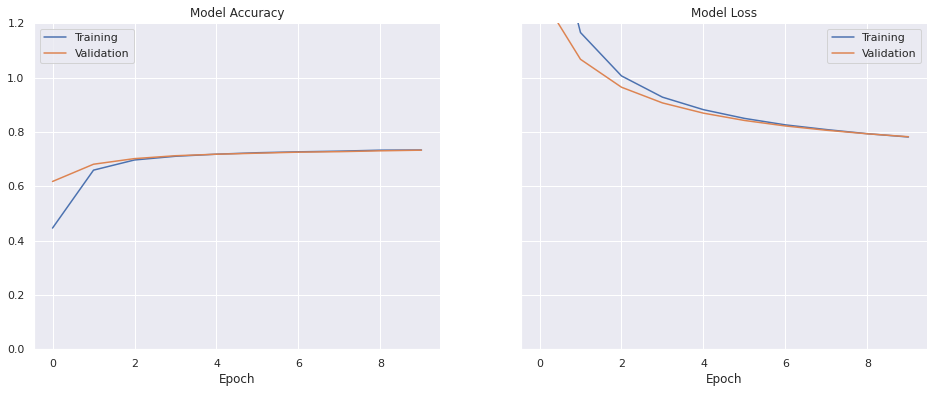

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plots(acc, val_acc, loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # plot accuracy
    ax1.plot(acc, label='Training')
    if val_acc is not None:
        ax1.plot(val_acc, label='Validation')

    ax1.set_xlabel('Epoch')
    ax1.set_title('Model Accuracy')
    ax1.legend(loc='upper left')
    ax1.set_ylim([0,1.2])

    # plot loss
    ax2.plot(loss, label='Training')
    if val_loss is not None:
        ax2.plot(val_loss, label='Validation')

    ax2.set_xlabel('Epoch')
    ax2.set_title('Model Loss')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0,1.2])

    sns.despine()
    sns.set_style("white")


    plt.show()

plt.rcParams["figure.figsize"] = (16,6)
plots(history.history["accuracy"],history.history['val_accuracy'],
      history.history["loss"],history.history['val_loss'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, input_dim = 93))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 50))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 9, activation = 'softmax'))
    classifier.compile(optimizer = 'sgd', 
                       loss = 'sparse_categorical_crossentropy', 
                       metrics = ['accuracy'])
    return classifier

classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 1s 13ms/step - loss: 2.1339 - accuracy: 0.2946 - val_loss: 1.3016 - val_accuracy: 0.6227
Epoch 2/10
50/50 [==============================] - 0s 10ms/step - loss: 1.2287 - accuracy: 0.6475 - val_loss: 1.0585 - val_accuracy: 0.6811
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 1.0321 - accuracy: 0.6926 - val_loss: 0.9619 - val_accuracy: 0.6980
Epoch 4/10
50/50 [==============================] - 0s 10ms/step - loss: 0.9486 - accuracy: 0.7065 - val_loss: 0.9079 - val_accuracy: 0.7075
Epoch 5/10
50/50 [==============================] - 0s 9ms/step - loss: 0.9062 - accuracy: 0.7100 - val_loss: 0.8725 - val_accuracy: 0.7126
Epoch 6/10
50/50 [==============================] - 1s 12ms/step - loss: 0.8655 - accuracy: 0.7176 - val_loss: 0.8472 - val_accuracy: 0.7155
Epoch 7/10
50/50 [==============================] - 0s 9ms/step - loss: 0.8385 - accuracy: 0.7223 - val_loss: 0.8280 - val_accuracy: 0.7177
Epoch 8/10
50/50

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, kernel_initializer = 'uniform', 
                         activation = 'relu', input_dim = 93))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', 
                         activation = 'relu'))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', 
                         activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop', 
                       loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [16]:
classifier = classifier()
history = classifier.fit(X_train, y_train, 
                         validation_data=(X_test,y_test), 
                         epochs=10, batch_size=1000)

Epoch 1/10
50/50 [==============================] - 1s 9ms/step - loss: 1.6823 - accuracy: 0.5483 - val_loss: 0.9041 - val_accuracy: 0.6812
Epoch 2/10
50/50 [==============================] - 0s 8ms/step - loss: 0.8288 - accuracy: 0.7067 - val_loss: 0.6910 - val_accuracy: 0.7408
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6732 - accuracy: 0.7475 - val_loss: 0.6400 - val_accuracy: 0.7529
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6349 - accuracy: 0.7592 - val_loss: 0.6109 - val_accuracy: 0.7610
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6054 - accuracy: 0.7679 - val_loss: 0.5941 - val_accuracy: 0.7689
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5801 - accuracy: 0.7715 - val_loss: 0.5853 - val_accuracy: 0.7730
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5702 - accuracy: 0.7774 - val_loss: 0.5836 - val_accuracy: 0.7689
Epoch 8/10
50/50 [==

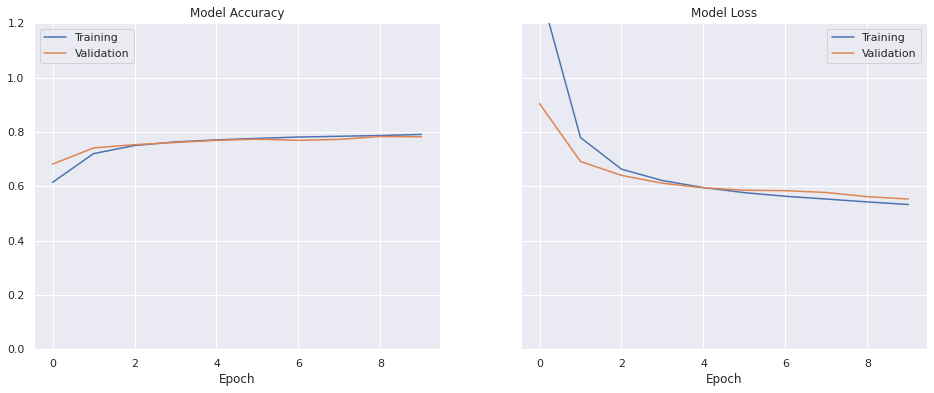

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plots(acc, val_acc, loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # plot accuracy
    ax1.plot(acc, label='Training')
    if val_acc is not None:
        ax1.plot(val_acc, label='Validation')

    ax1.set_xlabel('Epoch')
    ax1.set_title('Model Accuracy')
    ax1.legend(loc='upper left')
    ax1.set_ylim([0,1.2])

    # plot loss
    ax2.plot(loss, label='Training')
    if val_loss is not None:
        ax2.plot(val_loss, label='Validation')

    ax2.set_xlabel('Epoch')
    ax2.set_title('Model Loss')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0,1.2])

    sns.despine()
    sns.set_style("white")


    plt.show()

plt.rcParams["figure.figsize"] = (16,6)
plots(history.history["accuracy"],history.history['val_accuracy'],
      history.history["loss"],history.history['val_loss'])
sns.set()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu', input_dim = 93))
    classifier.add(Dense(units = 175, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 75, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [23]:
from keras.callbacks import EarlyStopping

classifier_es = classifier()
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

history_es = classifier_es.fit(X_train, y_train, validation_data=(X_test,y_test), 
                               epochs=100, batch_size=1000, callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - 2s 18ms/step - loss: 1.7929 - accuracy: 0.3408 - val_loss: 1.1621 - val_accuracy: 0.4765
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 1.0817 - accuracy: 0.5542 - val_loss: 0.8538 - val_accuracy: 0.6952
Epoch 3/100
50/50 [==============================] - 1s 12ms/step - loss: 0.8348 - accuracy: 0.6961 - val_loss: 0.7627 - val_accuracy: 0.7027
Epoch 4/100
50/50 [==============================] - 1s 12ms/step - loss: 0.7663 - accuracy: 0.7032 - val_loss: 0.7199 - val_accuracy: 0.7152
Epoch 5/100
50/50 [==============================] - 1s 12ms/step - loss: 0.7287 - accuracy: 0.7174 - val_loss: 0.7025 - val_accuracy: 0.7187
Epoch 6/100
50/50 [==============================] - 1s 12ms/step - loss: 0.6911 - accuracy: 0.7300 - val_loss: 0.6926 - val_accuracy: 0.7260
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6741 - accuracy: 0.7361 - val_loss: 0.7023 - val_accuracy: 0.7189
Epoch 

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

# build estimator, making model compatible with sklearn modules
estimator = KerasClassifier(build_fn=classifier, epochs=5, batch_size=1000, verbose=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
%time results = cross_val_score(estimator, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/philipharman/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/philipharman/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary cla

CPU times: user 34.8 s, sys: 1.04 s, total: 35.9 s
Wall time: 17 s
Accuracy: 72.64% (0.78%)


/home/philipharman/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(3, input_shape=(3,), activation="relu"))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.count_params()

16